In [1]:
import re
import simdjson as sj
import gzip
from tqdm import tqdm
import pandas as pd
from tqdm.notebook import tqdm
import swifter
import seaborn as sns
import numpy as np	
from nltk import sent_tokenize
import re
from sentence_transformers import SentenceTransformer
from wutils.general import save_pickle, load_pickle
from wutils.mat import MarkedMatrix
from scipy.spatial.distance import cdist
from sklearn.linear_model import LogisticRegression

In [2]:
import wutils
import importlib
importlib.reload(wutils)
from wutils.mat import MarkedMatrix

In [3]:
# good_df = load_pickle('./pickles/newest_good_sample_df.pkl')
# cord_df = load_pickle('./pickles/newest_good_cord_df.pkl')
# bad_df = load_pickle('./pickles/newest_bad_df.pkl')
good_df = load_pickle('./pickles/newest_good_sample_df_ft.pkl')
# cord_df = load_pickle('./pickles/newest_cord_df_ft.pkl')
cord_df = load_pickle('./pickles/who_cord_df.pkl')
bad_df = load_pickle('./pickles/newest_bad_df_ft.pkl')

In [4]:
cord_df

,cord_uid,source_x,title,abstract,authors,sentences,sent_embeddings,ft_embeddings
104326,2g4o1alu,WHO,COVID-19-related mortality by age groups in Eu...,"Background and Objectives: To date, more than ...","Cohen, JÃ©rÃ©mie F.; Korevaar, DaniÃ«l A.; Mat...",[COVID-19-related mortality by age groups in E...,"[[-0.055676993, -0.9243626, 0.6984887, -1.5472...","[[0.0481136, -0.045153778, -0.0016712277, -0.0..."
104355,bbumotlt,WHO,Inhibitors for Novel Coronavirus Protease Iden...,The rapid outbreak of the novel severe acute r...,"Fischer, André; Sellner, Manuel; Neranjan, San...",[Inhibitors for Novel Coronavirus Protease Ide...,"[[-0.23659688, -1.209985, 1.086681, -0.2994868...","[[0.019563006, 0.0033947488, 0.04383449, -0.06..."
104378,fmfp5a4x,WHO,Induction of “cytokine storm” in patients infe...,Coronaviruses are an extensive family of virus...,"Parra-Izquierdo, V.; Flórez-Sarmiento, C.; Rom...",[Induction of “cytokine storm” in patients inf...,"[[-0.6050015, -1.024411, 0.5046835, -0.9459065...","[[0.0046710027, -0.07187022, 0.008835351, -0.0..."
104382,n8muqsk8,WHO,The case series of 34 patients with COVID-19 d...,Background: A novel coronavirus (SARS-CoV-2) c...,"Kase, Kerstin; Skrzat-Klapaczynska, Agata; Vas...",[The case series of 34 patients with COVID-19 ...,"[[-0.5378597, -1.2903348, 0.29853648, -0.45812...","[[0.00923657, -0.010481103, 0.012520884, -0.03..."
104388,2rlld533,WHO,A brief overview of current drug repurposing a...,This brief overview is intended to shed light ...,"Fonseca Soares Rodrigues, P. da Thomaz D. V.",[A brief overview of current drug repurposing ...,"[[-0.84153324, -0.8163958, 0.36981186, -0.9351...","[[0.010491839, -0.066567436, -0.018717863, -0...."
...,...,...,...,...,...,...,...,...
301152,mbv6ot95,WHO,Statistical evaluation of selected air quality...,Air pollution has become a serious concern for...,"Masum, M. H.; Pal, S. K.",[Statistical evaluation of selected air qualit...,"[[-0.6117112, -0.66956645, 0.6793621, -0.59324...","[[-0.022183394, 0.018007744, 0.026416264, -0.0..."
311269,jfoflgah,WHO,Clinical features of patients with probable 20...,BACKGROUND: Coronavirus disease-19 COVID-19 is...,"Karkhah, S.; Ghazanfari, M. J.; Shamshirian, A...",[Clinical features of patients with probable 2...,"[[-0.22488534, -0.8938913, 0.7023613, -1.39347...","[[-0.010006628, -0.07970685, -0.0008492946, -0..."
312759,e4pr78n0,WHO,Mathematical modeling of COVID-19 transmission...,BackgroundWe evaluated how non-pharmaceutical ...,"Tuite, Ashleigh; Fisman, David N; Greer, Amy L",[Mathematical modeling of COVID-19 transmissio...,"[[-0.9591663, -0.7535791, 0.11427775, -0.55517...","[[-0.0031259845, -0.045985896, 0.01022184, -0...."
331600,j90w6so2,WHO,Impact of COVID-19 large scale restriction on ...,"COVID-19 has a severe and widespread impact, e...","Caraka, R. E. Lee Y. Kurniawan R. Herliansyah ...",[Impact of COVID-19 large scale restriction on...,"[[-0.6988445, -0.4860237, -0.33028847, -0.6850...","[[-0.022731125, -0.008827577, 0.009168559, -0...."


In [5]:
good_df['mean_embed'] = good_df['sent_embeddings'].swifter.apply(lambda x: x.mean(axis=0))
bad_df['mean_embed'] = bad_df['sent_embeddings'].swifter.apply(lambda x: x.mean(axis=0))
cord_df['mean_embed'] = cord_df['sent_embeddings'].swifter.apply(lambda x: x.mean(axis=0))
# good_df['mean_embed'] = good_df['ft_embeddings'].swifter.apply(lambda x: np.array(x).mean(axis=0))
# bad_df['mean_embed'] = bad_df['ft_embeddings'].swifter.apply(lambda x: np.array(x).mean(axis=0))
# cord_df['mean_embed'] = cord_df['ft_embeddings'].swifter.apply(lambda x: np.array(x).mean(axis=0))

In [7]:
good_df['hostname'] = good_df['url'].swifter.apply(get_hostname)
bad_df['hostname'] = bad_df['url'].swifter.apply(get_hostname)

NameError: name 'get_hostname' is not defined

In [11]:
good_df['hostname'].value_counts()

www.reuters.com           5630
www.thehindu.com          5158
www.france24.com          3497
www.forbes.com            3433
indianexpress.com         3188
                          ... 
cn.nytimes.com               1
tucson.com                   1
www.mediamatters.org         1
uk.reuters.com               1
www.hindustantimes.com       1
Name: hostname, Length: 238, dtype: int64

In [ ]:
bad_df = bad_df[bad_df['hostname'] != 'www.washingtontimes.com']

In [10]:
bad_df.hostname.value_counts()

www.washingtontimes.com           8969
beforeitsnews.com                 7017
www.wnd.com                       1655
www.redstate.com                   722
www.theblaze.com                   589
bigleaguepolitics.com              542
pjmedia.com                        506
humansarefree.com                  328
www.breitbart.com                  233
techstartups.com                   225
dcdirtylaundry.com                 169
worldtruth.tv                      163
sonsoflibertymedia.com             156
www.dcclothesline.com              140
buffalochronicle.com               108
theconservativetreehouse.com        97
bb4sp.com                           74
www.technocracy.news                49
www.collective-evolution.com        30
newsblaze.com                       23
www.americafirstprojects.com        18
clashdaily.com                      14
powderedwigsociety.com              12
www.westonaprice.org                 9
www.tierneyrealnewsnetwork.com       4
holistichealth.one       

In [6]:
import urllib.parse
def get_hostname(url):
    o = urllib.parse.urlsplit(url)
    return o.hostname

In [8]:
good_df['ft_has_nan'] = good_df['mean_embed'].swifter.apply(lambda x: np.isnan(np.array(x)).any())
good_df = good_df[~good_df['ft_has_nan']]
bad_df['ft_has_nan'] = bad_df['mean_embed'].swifter.apply(lambda x: np.isnan(np.array(x)).any())
bad_df = bad_df[~bad_df['ft_has_nan']]

In [16]:
save_pickle(good_df, './fake_eval/clean_good_df.pkl')
save_pickle(bad_df, './fake_eval/clean_bad_df.pkl')

In [15]:
len(good_df), len(bad_df)

(97539, 21135)

In [9]:
s_good = good_df.dropna().sample(n=30000)
s_bad = bad_df.dropna()
s_cord = cord_df.dropna().sample(n=5000)

In [10]:
mat_good = np.array(list(s_good['mean_embed']))
mat_bad = np.array(list(s_bad['mean_embed']))
mat_cord = np.array(list(s_cord['mean_embed']))

In [9]:
mm = MarkedMatrix([('real news', mat_good), ('fake news', mat_bad), ('CORD', mat_cord)])

array([[-79.20345  ,  30.722397 ],
       [ -7.4035416,  24.977829 ],
       [ 16.176777 ,  -6.0799174],
       ...,
       [ 54.92865  , -22.486969 ],
       [ 45.436928 ,   5.489793 ],
       [ 18.174372 ,  12.685622 ]], dtype=float32)

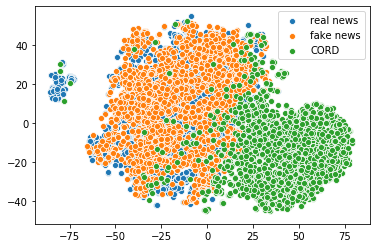

In [18]:
mm.tsne()

In [ ]:
mm.default_classify()

In [10]:
good_df['sent_embeddings'][834328].mean(axis=0).shape

(768,)

In [35]:
np.isnan(mat_good).any()

True

In [36]:
np.isnan(mat_bad).any()

True

In [17]:
np.isnan(mat_cord).any()

False

In [11]:
good2cord = cdist(mat_good, mat_cord, 'cosine')
bad2cord = cdist(mat_bad, mat_cord, 'cosine')

In [12]:
mm2 = wutils.mat.MarkedMatrix((('real', good2cord), ('fake', bad2cord)))

In [13]:
model = LogisticRegression(max_iter=100, verbose=1, n_jobs=16, solver='lbfgs')

In [15]:
np.max(good2cord)

1.1084635247831385

In [16]:
mm2.single_split_classify(model)

Training model...


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.


Evaluating model...


[Parallel(n_jobs=16)]: Done   1 out of   1 | elapsed: 13.3min finished


(0.7115087935822277, 0.7583979328165376)

In [18]:
np.argmax(model.coef_)

2077

In [19]:
def get_results(num, k=5):
    res = model.predict(good2cord[num, :].reshape(1, -1))
    weights = model.coef_ * good2cord[num, :].T
    top_k = np.argsort(weights)[0, :k]
    print('Clean Text: ', s_good.iloc[num].cleanText)
    for el in top_k:
        print('-'*25)
        print(f'Related abstract ({el}): {s_cord.iloc[el].abstract}')
        print(f'Related title ({el}): {s_cord.iloc[el].title}')

In [25]:
get_results(190)

Clean Text:  The Post reports: “More than 6.6 million Americans applied for unemployment benefits last week — a record — as political and public health leaders put the economy in a deep freeze, keeping people at home and trying to slow the spread of the deadly coronavirus.” The magnitude of the job losses so far — and there will be more to come — is staggering. (“The past two weeks have erased nearly all the jobs created in the past five years, a sign of how rapid, deep and painful the economic shutdown has been on many American families who are struggling to pay rent and health insurance costs in the midst of a pandemic.”) The number of claims so far, more than 10 million, is likely understated “since a lot of newly unemployed Americans haven’t been able to fill out a claim yet.”
As businesses find they can no longer hold out, declare bankruptcy or shut their doors, more people will lose their jobs. Employees asked to take pay cuts one month will find that their employer in a month or

In [77]:
res = model.predict(good2cord[10, :].reshape(1, -1))

In [82]:
weights = model.coef_ * good2cord[10, :].T

In [87]:
np.argmax(weights)

93

In [90]:
s_good.iloc[93].cleanText

'A hockey stick, homemade fabric bags and hand sanitizer will soon be part of a COVID-19 exhibit being curated by staff at the Royal Alberta Museum.\n"We realized we\'re living in historic times and it\'s our job to document that," said Julia Petrov, curator of daily life and leisure at the RAM and in charge of the pandemic exhibit.\n"We don\'t want to end up in a situation in 100 years from now when people ask us \'Well, do you have anything from the pandemic?\' and our future curators say \'No, we didn\'t collect anything.\'"\nPetrov and others at the museum have started to collect hand sanitizer made by Alberta breweries, homemade fabric bags and supplies from mask-making kits.\nMuseum staff has also asked for CBC\'s Radio Active co-host Rod Kurtz\'s hockey stick, which has been used as a microphone boom during the pandemic, to also be part of the exhibit.\n"We\'re trying to get a good sampling of people\'s responses to the pandemic," Petrov told CBC\'s Radio Active on Wednesday.\nS

In [88]:
s_cord.iloc[93].abstract

'The NIH, FDA and CDC offer a wide spectrum of job opportunities focused on improving public health through the discovery and translation of research, the regulation of safe and effective medicines, and the protection of health security.'

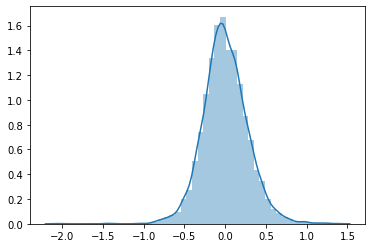

In [68]:
sns.distplot(model.coef_)

In [10]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000, verbose=1, n_jobs=16, solver='lbfgs')

In [11]:
mm2.single_split_classify(model)

Training model...


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.


Evaluating model...


[Parallel(n_jobs=16)]: Done   1 out of   1 | elapsed: 112.5min finished


(0.74592, 0.6683375104427736)

In [61]:
mm3 = MarkedMatrix([('real news', mat_good), ('fake news', mat_bad)])
model3 = LogisticRegression(max_iter=1000, verbose=1, solver='lbfgs', n_jobs=16)
mm3.single_split_classify(model3)

Training model...


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.


Evaluating model...


[Parallel(n_jobs=16)]: Done   1 out of   1 | elapsed:   26.5s finished


(0.74616, 0.657232364696986)

In [12]:
save_pickle(model, './pickles/lr_model_5000_samp.pkl')

In [13]:
save_pickle(s_cord, './pickles/new_cord_5000_samp.pkl')

In [16]:
mm3 = MarkedMatrix([('real news', mat_good), ('fake news', mat_bad)])
mm3.default_classify()

========== Performing k-fold validation (0) ==========
Training Random Forest
Random Forest accuracy: 0.7584
Random Forest F1 score: 0.8140394088669951
---------------
Training XGBoost
XGBoost accuracy: 0.7472
XGBoost F1 score: 0.7991419037025266
---------------
Training KNN
KNN accuracy: 0.7153
KNN F1 score: 0.7538261997405966
---------------
Training Logistic Regression


/home/will/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression accuracy: 0.7938
Logistic Regression F1 score: 0.8297274979355904
---------------
Training Linear SVM
Linear SVM accuracy: 0.7983
Linear SVM F1 score: 0.8330988829127017
---------------
========== Performing k-fold validation (1) ==========
Training Random Forest
Random Forest accuracy: 0.7575
Random Forest F1 score: 0.8142474147836077
---------------
Training XGBoost
XGBoost accuracy: 0.7506
XGBoost F1 score: 0.8029704534681624
---------------
Training KNN
KNN accuracy: 0.7182
KNN F1 score: 0.7557212205270457
---------------
Training Logistic Regression


/home/will/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression accuracy: 0.7922
Logistic Regression F1 score: 0.8300899427636959
---------------
Training Linear SVM
Linear SVM accuracy: 0.7965
Linear SVM F1 score: 0.833073578869658
---------------
========== Performing k-fold validation (2) ==========
Training Random Forest
Random Forest accuracy: 0.7545
Random Forest F1 score: 0.808934547435598
---------------
Training XGBoost
XGBoost accuracy: 0.7541
XGBoost F1 score: 0.8025375411547419
---------------
Training KNN


KeyboardInterrupt: 

In [ ]:
mm2.default_classify()

========== Performing k-fold validation (0) ==========
Training Random Forest
Random Forest accuracy: 0.7205
Random Forest F1 score: 0.5953380628348053
---------------
Training XGBoost
XGBoost accuracy: 0.7088
XGBoost F1 score: 0.582688449412439
---------------
Training KNN
KNN accuracy: 0.6633
KNN F1 score: 0.5842696629213484
---------------
Training Logistic Regression


/home/will/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression accuracy: 0.7274
Logistic Regression F1 score: 0.6416929547844374
---------------
Training Linear SVM
Linear SVM accuracy: 0.7574
Linear SVM F1 score: 0.6876930998970133
---------------
========== Performing k-fold validation (1) ==========
Training Random Forest
Random Forest accuracy: 0.7183
Random Forest F1 score: 0.5917982901028837
---------------
Training XGBoost
XGBoost accuracy: 0.7117
XGBoost F1 score: 0.5840427066801327
---------------
Training KNN


In [10]:
claim_df = load_pickle('./pickles/newest_claims_df_labelled.pkl')
mat_claims = np.array(list(claim_df['ft_embedding']))

In [11]:
claim_df['ft_embedding'].swifter.apply(lambda x: np.isnan(x).any())

0      False
1      False
2      False
3      False
4      False
       ...  
870    False
871    False
872    False
873    False
874    False
Name: ft_embedding, Length: 875, dtype: bool

In [12]:
c_model = LogisticRegression(max_iter=1000, verbose=1, solver='lbfgs', n_jobs=16)

In [75]:
good2claims = cdist(mat_good, mat_claims)
bad2claims = cdist(mat_bad, mat_claims)

In [76]:
np.isnan(bad2claims).any()

False

In [17]:
mm = MarkedMatrix((('good', good2claims), ('bad', bad2claims)))

In [19]:
mm_ft = MarkedMatrix((('good', mat_good), ('bad', mat_bad)))

In [23]:
save_pickle(mm, 'pickles/newest_mm_claims.pkl')
save_pickle(mm_ft, 'pickles/newest_mm_ft_claims.pkl')

In [79]:
mm.single_split_classify(c_model)

Training model...


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.


Evaluating model...


[Parallel(n_jobs=16)]: Done   1 out of   1 | elapsed: 16.2min finished


(0.75976, 0.687610527410798)

In [80]:
ft_model = LogisticRegression(max_iter=1000, verbose=1, solver='lbfgs', n_jobs=16)
mm_ft.single_split_classify(ft_model)

Training model...


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.


Evaluating model...


[Parallel(n_jobs=16)]: Done   1 out of   1 | elapsed:   23.4s finished


(0.75288, 0.6699433700181644)

In [48]:
good_df.iloc[55]

authors                                                           []
publishDate                                2020-06-02 23:36:01+05:30
cleanText          Sources said Arora had also written to ICMR an...
title              Covid cases in Haryana now doubling every 6 da...
url                https://indianexpress.com/article/cities/chand...
covidFreq                                                          7
sentences          [Sources said Arora had also written to ICMR a...
fixed_sent         [Sources said Arora had also written to ICMR a...
sent_embeddings    [[0.14723144, -0.888705, 0.025974467, 0.419926...
ft_embeddings      [[-0.003661152, 0.005573827, 2.6989728e-06, 0....
mean_embed         [-0.0030042257, 0.012192692, 0.008261091, 0.02...
ft_has_nan                                                     False
Name: 917085, dtype: object

In [77]:
def get_claims_res(num, k=5, use_good=True):
    if use_good:
        target_df = good_df
        target_mat = good2claims
    else:
        target_df = bad_df
        target_mat = bad2claims
    res = c_model.predict(target_mat[num, :].reshape(1, -1))
    print('Classification result: ', res)
    weights = c_model.coef_ * target_mat[num, :].T
    top_k = np.argsort(weights)[0, -k:]
    print('Clean Text: ', target_df.iloc[num].cleanText)
    for el in top_k:
        print('-'*25)
        print(f'Related claim ({el}): {claim_df.iloc[el].text}')
        print(f'Related review ({el}): {claim_df.iloc[el].claimReview}')

In [78]:
get_claims_res(55, use_good=False)

Classification result:  [0]
Clean Text:  More than $40 million worth of potentially dangerous food and drink has been seized in an operation coordinated by Europol and Interpol.
Operation Opson IX dismantled 19 organized crime groups and led to the arrest of 407 people worldwide. About 12,000 tons of illegal and harmful products were confiscated but results were at least partially affected by the Coronavirus pandemic.
In Bulgaria, an investigation by police and the food safety agency into an unregistered warehouse found seven samples of cheese which tested positive for E. coli. Some 3.6 tons of unsafe dairy products set to be processed into melted cheese were destroyed.
As part of a focus on dairy, 320 tons of smuggled or substandard items were seized by Bulgaria, Italy, France, Greece, Portugal and Switzerland. This included rotten milk and cheese which posed a threat to public health.
Police, customs, national food authorities and private sector partners in 77 countries took part in 